# Data exploration

The goal of this notebook is to understand how our data is (IXI Dataset) in order to know how to process it accordingly.

## Importing packages

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from math import ceil, floor
import nibabel as nib
import os
from random import randint
import pandas as pd
from pathlib import Path

## Analyising NifTI metadata

In [2]:
NIFTI_IMAGE_PATH = Path("/home/epou/Documents/UOC/TFM/IXI-T1/")

In [3]:
def image_loader_generator(path=NIFTI_IMAGE_PATH):
    for image in os.scandir(path):
        if image.is_file():
            yield image

def load_image_metadata_generator():

    for image in image_loader_generator():
        img = nib.load(image.path)
        x,y,z = img.shape
        yield {'Image': image.name, 'X':x, 'Y':y, 'Z':z}

df = pd.DataFrame(load_image_metadata_generator())

In [4]:
df

,Image,X,Y,Z
0,IXI603-HH-2701-T1.nii.gz,256,256,150
1,IXI185-Guys-0795-T1.nii.gz,256,256,150
2,IXI381-Guys-1024-T1.nii.gz,256,256,150
3,IXI644-Guys-1121-T1.nii.gz,256,256,150
4,IXI260-HH-1805-T1.nii.gz,256,256,150
...,...,...,...,...
576,IXI111-Guys-0734-T1.nii.gz,256,256,150
577,IXI276-HH-1840-T1.nii.gz,256,256,150
578,IXI462-IOP-1042-T1.nii.gz,256,256,146
579,IXI326-Guys-0907-T1.nii.gz,256,256,150


### Statistics

In [5]:
df.groupby(['X','Y','Z']).count()

Image
X   Y   Z         
256 256 130      2
        140      2
        146     74
        150    503

As it can observed not all volumes are composed by the same number of slices (Z in the table above).

# Observation

In [6]:
def print_random_images(name, num=3):
    
    full_path = NIFTI_IMAGE_PATH / name
    
    nii_img = nib.load(full_path)
    nii_data = nii_img.get_fdata()

    number_of_slices = nii_data.shape[2]
    # Define subplot layout 
    aspect_ratio = 1./1
    number_of_colums = int(num/2 * aspect_ratio)
    if( num % number_of_colums > 0):
        number_of_colums += 1
    number_of_rows = ceil(num / number_of_colums)
    
    # Setup  figure
    fig, axs = plt.subplots(number_of_rows, number_of_colums, constrained_layout=True, figsize=(15,8))
    fig.suptitle('Nifti {} slices for {}'.format(num, name), fontsize=16)
    #-------------------------------------------------------------------------------

    for i, ax in enumerate(axs.flat):
        if i < num:
            slice = randint(
                ceil(i*number_of_slices/num), 
                floor((i+1)*number_of_slices/num)
            )
            ax.imshow(
                nii_data[:,:,slice],
                cmap='gray', 
                interpolation=None
            )
            ax.set_title("slice {}".format(slice))
            ax.axis('off')
        else:
            ax.axis('off')
            
    return fig

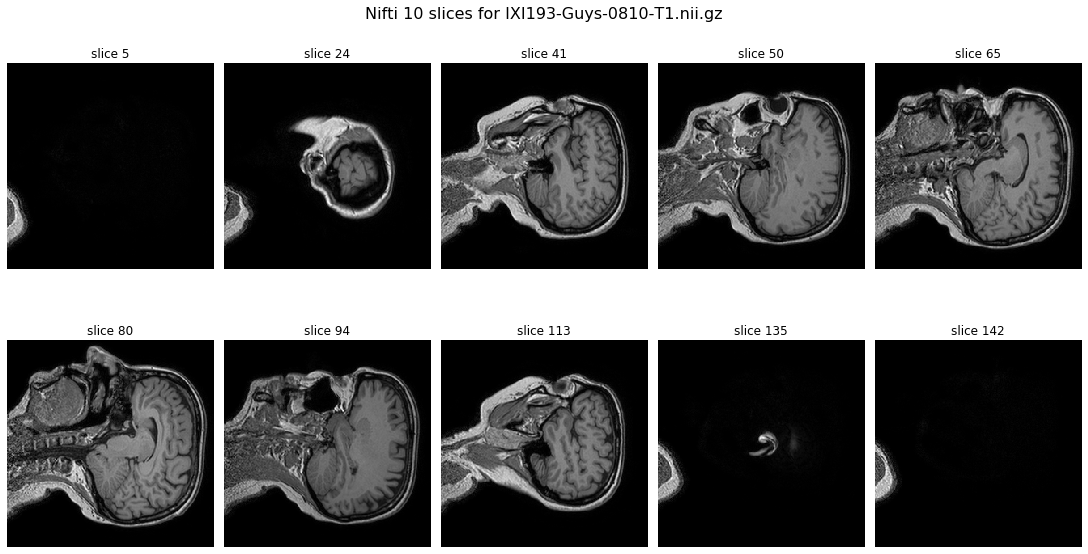

In [7]:
fig_test = print_random_images(
    name=df["Image"].sample().item(),
    num=10
)

A manual observation is enough to determine that all images are taken from a **saggital** point of view.

Moreover, as it can be observed not all images contains useful information about the subject's brain.
We will take only the 45% of the central slices of each subject (using percentage and not a fixed number due to the non depth equality).